<a href="https://www.kaggle.com/code/yuecel/product-recommendation-with-apriori-algorithm?scriptVersionId=150413131" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv


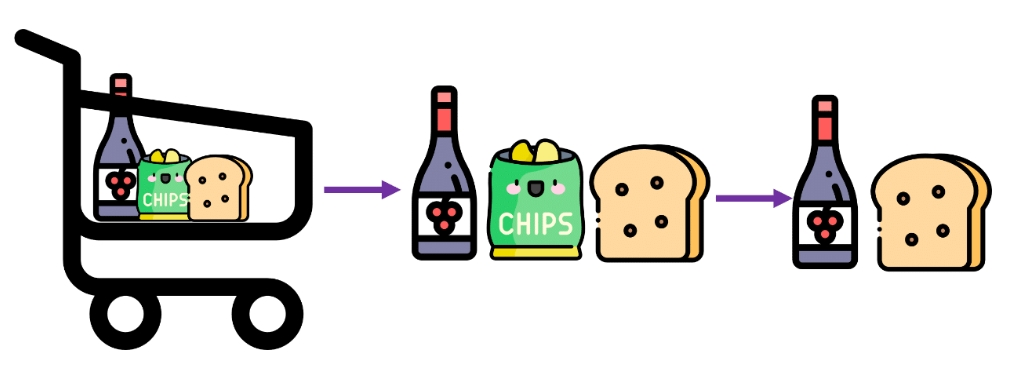

# WHAT IS AN APRIORI ALGORITHM?

#### Apriori algorithm searches for a series of frequent sets of items in the datasets. It builds on associations and correlations between the itemsets.It is the algorithm that underlies the commonly encountered 'You may also like' feature in recommendation platforms.

**Components of Apriori algorithm:**
* Support
* Confidence
* Lift

**Support:**
Support measures how frequently a particular item or itemset (combination of items) appears in the dataset.
High support values indicate that the itemset is commonly found in the dataset.


**Confidence:**
Confidence signifies the likelihood of the item A being purchased when item B is purchased.

**Lift:**
Lift (x => y) is the likelihood of the item y being purchased when item x is sold. 

Lift values greater than 1 indicate a positive association between A and B, meaning they are more likely to co-occur together than expected by chance. 

Values less than 1 indicate a negative association.


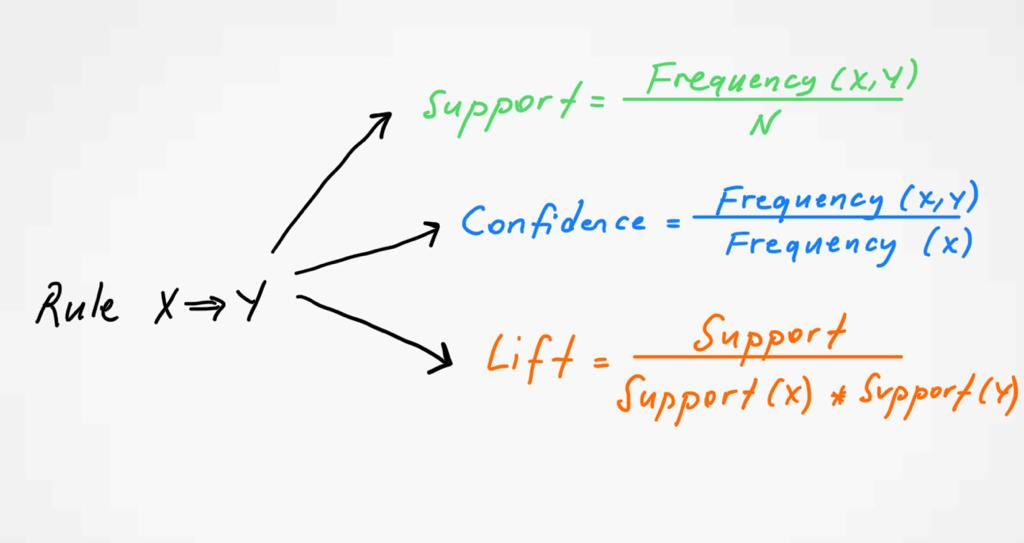






In [2]:
#importing libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
#reading dataset
df = pd.read_csv("/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv")

In [4]:
#information of data set size
df.shape

(2019501, 12)

In [5]:
#since the data set is very large, we will only work with 200,000 lines
df = df[:300000]

In [6]:
#taking general information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                300000 non-null  int64  
 1   user_id                 300000 non-null  int64  
 2   order_number            300000 non-null  int64  
 3   order_dow               300000 non-null  int64  
 4   order_hour_of_day       300000 non-null  int64  
 5   days_since_prior_order  280373 non-null  float64
 6   product_id              300000 non-null  int64  
 7   add_to_cart_order       300000 non-null  int64  
 8   reordered               300000 non-null  int64  
 9   department_id           300000 non-null  int64  
 10  department              300000 non-null  object 
 11  product_name            300000 non-null  object 
dtypes: float64(1), int64(9), object(2)
memory usage: 27.5+ MB


In [7]:
#observing first 5 rows
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [8]:
#checking null values
df.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    19627
product_id                    0
add_to_cart_order             0
reordered                     0
department_id                 0
department                    0
product_name                  0
dtype: int64

In [9]:
#since we are going to make changes to the original database, we make a backup of the first version
df_backup = df.copy() 

In [10]:
#taking column names
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [11]:
#we are creating a "market basket" from the dataset by selecting order_id and product_id and product_name columns 
df = df[["order_id", "product_id", "product_name"]]

### To use the apriori algorithm we need to organize the data as in this table:

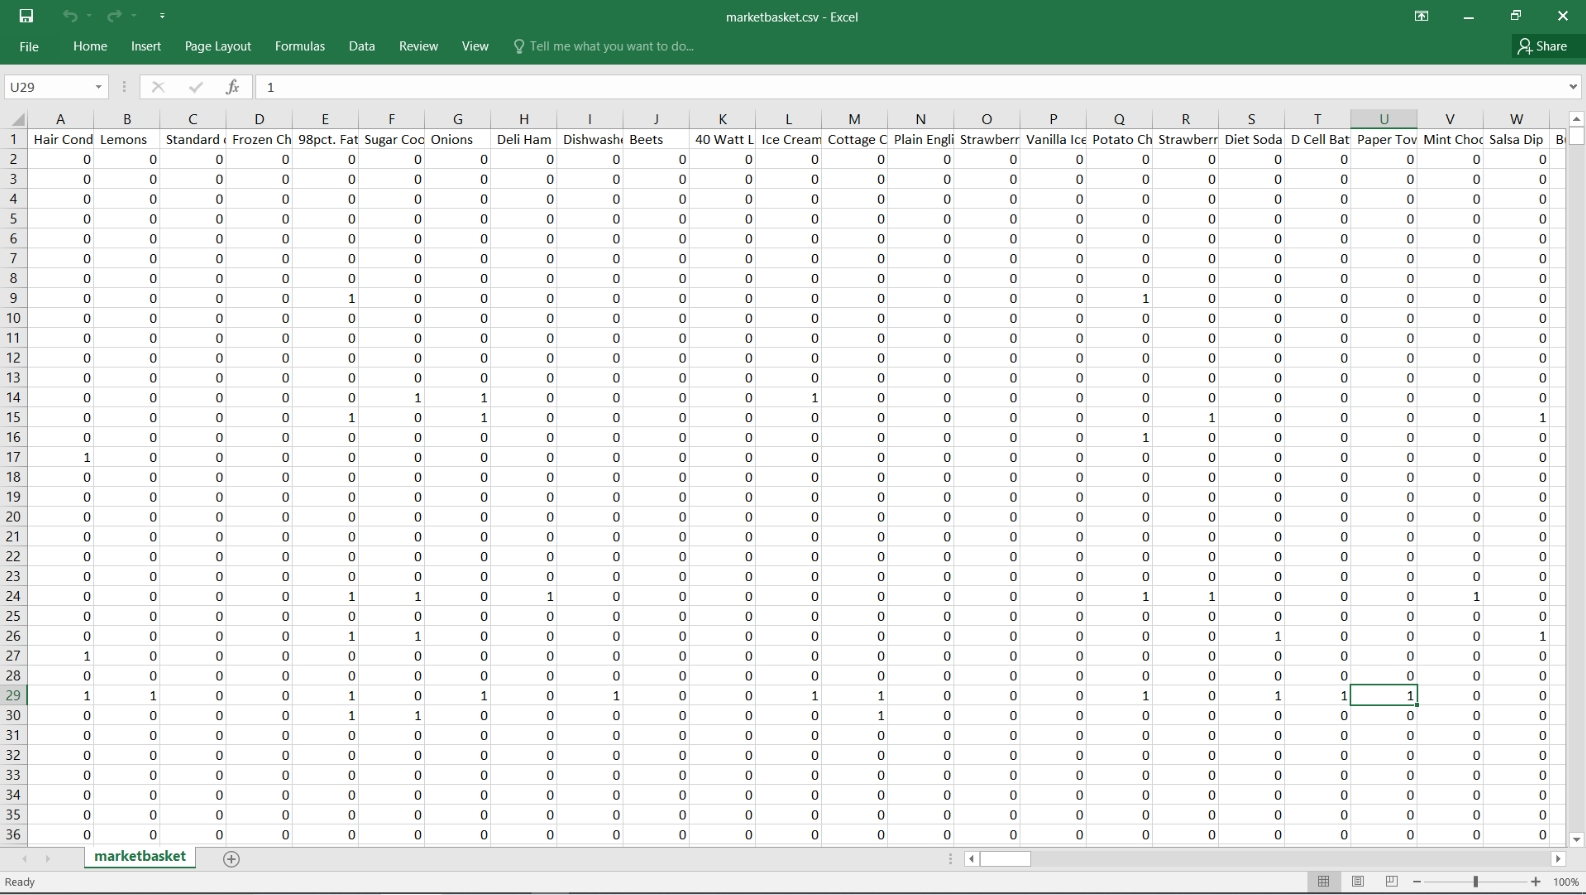

In [12]:
#step by step making a table like the one above
df.groupby(['order_id', "product_id"])['product_name'].count()
df.groupby(['order_id', "product_id"])['product_name'].count().unstack()
df.groupby(['order_id', "product_id"])['product_name'].count().unstack().fillna(0)
df.groupby(['order_id', "product_id"])['product_name'].count().unstack().fillna(0).\
            applymap(lambda x: 1 if x > 0 else 0)

table = df.groupby(['order_id', "product_id"])['product_name'].count().unstack().fillna(0).\
            applymap(lambda x: 1 if x > 0 else 0)

In [13]:
table

product_id,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
order_id,,,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
900,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419611,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3419714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3420184,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#gives product name of the product id
def get_name(dataframe, product_id):
    product_name = dataframe[dataframe["product_id"] == product_id]["product_name"].values[0]
    print(product_name)

In [15]:
#brings the product name with product_id = 17
get_name(df, 17)

baking ingredients


In [16]:
#Taking Association Rules

In [17]:
#the apriori algorithm is applied before taking association rules
frequent_itemsets = apriori(table, min_support = 0.01, use_colnames = True)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
frequent_itemsets

,support,itemsets
0,0.019575,(1)
1,0.024571,(2)
2,0.086436,(3)
3,0.052584,(4)
4,0.017517,(5)
...,...,...
2980,0.011239,"(112, 83, 84, 21, 24, 123)"
2981,0.017787,"(83, 84, 21, 24, 123, 120)"
2982,0.010496,"(107, 83, 21, 24, 123, 120)"
2983,0.012657,"(112, 83, 21, 24, 123, 120)"


In [19]:
#taking association rules
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)

In [20]:
#we can sort itemsets according to confidence, support of lift
rules.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9539,"(24, 16, 59)",(83),0.010969,0.444497,0.010463,0.953846,2.145900,0.005587,12.035900,0.539917
9567,"(24, 81, 16)",(83),0.012589,0.444497,0.011982,0.951743,2.141168,0.006386,11.511258,0.539760
9665,"(24, 16, 116)",(83),0.014580,0.444497,0.013838,0.949074,2.135164,0.007357,10.908060,0.539518
18664,"(16, 24, 91, 123)",(83),0.011273,0.444497,0.010665,0.946108,2.128491,0.005655,10.307668,0.536228
9791,"(16, 123, 116)",(83),0.011374,0.444497,0.010733,0.943620,2.122895,0.005677,9.852870,0.535030
...,...,...,...,...,...,...,...,...,...,...
21930,(24),"(123, 83, 116, 86)",0.555604,0.011374,0.010024,0.018042,1.586211,0.003705,1.006790,0.831617
22170,(24),"(96, 123, 83, 107)",0.555604,0.011104,0.010024,0.018042,1.624781,0.003855,1.007065,0.865293
4233,(24),"(121, 37)",0.555604,0.014648,0.010024,0.018042,1.231689,0.001886,1.003456,0.423287
11032,(24),"(123, 92, 21)",0.555604,0.011374,0.010024,0.018042,1.586211,0.003705,1.006790,0.831617


In [21]:
#we can also add some additional thresholds
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2245,"(24, 83)",(16),0.318438,0.089743,0.060211,0.189083,2.106937,0.031634,1.122503,0.770843
2248,(16),"(24, 83)",0.089743,0.318438,0.060211,0.670929,2.106937,0.031634,2.071170,0.577175
10691,"(120, 83)","(24, 21)",0.148942,0.154815,0.050491,0.338998,2.189707,0.027433,1.278644,0.638403
10694,"(24, 21)","(120, 83)",0.154815,0.148942,0.050491,0.326139,2.189707,0.027433,1.262958,0.642839
14708,"(120, 24)","(83, 84)",0.190523,0.125215,0.050896,0.267139,2.133440,0.027040,1.193657,0.656317
14709,"(120, 83)","(24, 84)",0.148942,0.165750,0.050896,0.341718,2.061648,0.026209,1.267314,0.605072
14712,"(24, 84)","(120, 83)",0.165750,0.148942,0.050896,0.307066,2.061648,0.026209,1.228195,0.617262
14713,"(83, 84)","(120, 24)",0.125215,0.190523,0.050896,0.406469,2.133440,0.027040,1.363833,0.607319


In [22]:
#Product Recommendation
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]


In [23]:
#getting a recommendation
arl_recommender(rules, 17, 1)

#product_id = 17 : baking ingredients

#Recommended product_id : 104

[104]

In [24]:
#getting the name of recommended 
get_name(df, 104)

#product_id = 17 : baking ingredients
#product_id = 104 : spices seasonings

spices seasonings


**Now, this is how apriori algorithm works in a basic way.** 

**We can offer product "spices seasonings" to the customer who buys product "baking ingredients".**

**It seems to be a very suitable suggestion :)**

**This notebook is prepared based on the knowledge I gained from Miuul Data Scientist Bootcamp**

**If you found this notebook helpful, I would greatly appreciate an upvote.**



References: 

https://towardsdatascience.com/underrated-machine-learning-algorithms-apriori-1b1d7a8b7bc

https://intellipaat.com/blog/data-science-apriori-algorithm/

https://www.javatpoint.com/apriori-algorithm

image resource 1: 
https://intellipaat.com/blog/data-science-apriori-algorithm/

image resource 2: 
https://stackoverflow.com/questions/67370455/apriori-algorithm-in-python-using-jupyter-notebook